# Exploratory Data Analysis for PowerCo

## Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the data

For this project, two datasets were used: `client` dataset and `price` dataset. The `client` dataset includes essential data about the customers like `forecast_price_energy_peak`, which is the forecasted energy price for the 2nd period. The `price` dataset includes the prices of energy and power services, as well as accompanying client IDs.


In [2]:
client = pd.read_csv('data/client_data.csv')
price = pd.read_csv('data/price_data.csv')

In [3]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client.shape

(14606, 26)

In [5]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
price.shape

(193002, 8)

## Descriptive analysis

In [7]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
client['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [11]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Merging of two datasets

I merged the two datasets to make the EDA and calculation of price sensitivity easier. The `client` dataset was merged with the `price` dataset on the `id` column. The resulting dataset was named `df`. 

In [12]:
merged = pd.merge(client[['id', 
                         'churn', 
                         'forecast_cons_12m', 
                         'forecast_cons_year', 
                         'forecast_price_energy_off_peak',
                         'forecast_price_energy_peak',
                         'forecast_price_pow_off_peak']], price, on='id')

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   churn                           175149 non-null  int64  
 2   forecast_cons_12m               175149 non-null  float64
 3   forecast_cons_year              175149 non-null  int64  
 4   forecast_price_energy_off_peak  175149 non-null  float64
 5   forecast_price_energy_peak      175149 non-null  float64
 6   forecast_price_pow_off_peak     175149 non-null  float64
 7   price_date                      175149 non-null  object 
 8   price_off_peak_var              175149 non-null  float64
 9   price_peak_var                  175149 non-null  float64
 10  price_mid_peak_var              175149 non-null  float64
 11  price_off_peak_fix              175149 non-null  float64
 12  price_peak_fix  

In [14]:
merged.shape

(175149, 14)

In [15]:
merged.head()

,id,churn,forecast_cons_12m,forecast_cons_year,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


## Calculating Price Sensitivity

Formula I used: price_sensitivity = (forecast_price_energy_off_peak - price_off_peak_var) * forecast_cons_12m + (forecast_price_energy_peak - price_peak_var) * forecast_cons_12m + (forecast_price_pow_off_peak - price_off_peak_fix) * forecast_cons_year

In [16]:
merged['price_sensitivity'] = (merged['forecast_price_energy_off_peak'] - merged['price_off_peak_var']) * merged['forecast_cons_12m'] + (merged['forecast_price_energy_peak'] - merged['price_peak_var']) * merged['forecast_cons_12m'] + (merged['forecast_price_energy_peak'] - merged['price_peak_var']) * merged['forecast_cons_12m'] + (merged['forecast_price_pow_off_peak'] - merged['price_peak_fix']) * merged['forecast_cons_year']

In [40]:
merged.head()

,id,churn,forecast_cons_12m,forecast_cons_year,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_sensitivity
0,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.0
1,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.0
2,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.0
3,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.0
4,24011ae4ebbe3035111d65fa7c15bc57,1,0.0,0,0.114481,0.098142,40.606701,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.0


In [18]:
merged['churn'].value_counts()

churn
0    158146
1     17003
Name: count, dtype: int64

## Showing the correlation between price sensitivity and churn

I used barplot to show the correlation between price sensitivity and churn. The barplot showed that less clients churned, despite the high price sensitivity. Higher price sensitivity should result into higher churn, but it turned out the other way, which means price sensitivity and churn is not correlated.

Text(0.5, 1.0, 'Correleation Between Price Sensitivity and Churn')

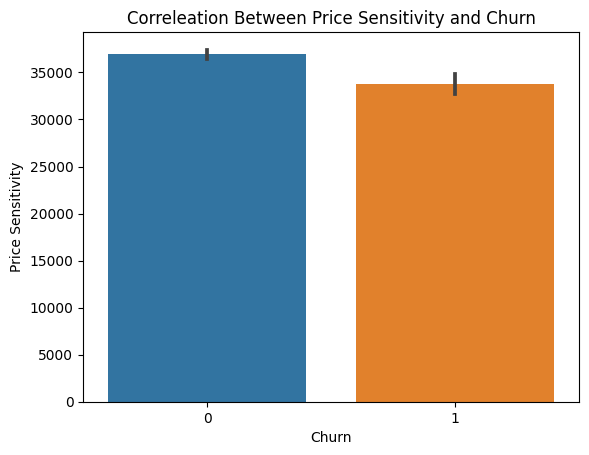

In [41]:
sns.barplot(x='churn', y='price_sensitivity', data=merged)
plt.ylabel('Price Sensitivity')
plt.xlabel('Churn')
plt.title('Correleation Between Price Sensitivity and Churn')
#display values on bars